# Импортируем библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import scipy as sp
import statsmodels
import random as rd
import math
import pingouin as pg

!pip install scikit-gof
from skgof import ad_test, ks_test

ModuleNotFoundError: ignored

In [ ]:
!pip install pingouin

In [ ]:
!pip install openpyxl

# Вводим данные исследования

In [2]:
import openpyxl

wb = openpyxl.load_workbook('students.xlsx')
sheet = wb.active

names = []
sex = []
year_study = []
intelligence_lvl = []
erudition_lvl = []
height_lvl = []
weight_lvl = []
beauty_lvl = []

for cell in sheet['B']:
    names.append(cell.value)
names = names[1:]

for cell in sheet['C']:
    sex.append(cell.value)
sex = sex[1:]

for cell in sheet['D']:
    year_study.append(cell.value)
year_study = year_study[1:]

for cell in sheet['K']:
        intelligence_lvl.append(cell.value)
intelligence_lvl = intelligence_lvl[1:]

for cell in sheet['M']:
        erudition_lvl.append(cell.value)
erudition_lvl = erudition_lvl[1:]

for cell in sheet['O']:
        height_lvl.append(cell.value)
height_lvl = height_lvl[1:]

for cell in sheet['R']:
        weight_lvl.append(cell.value)
weight_lvl = weight_lvl[1:]

for cell in sheet['U']:
        beauty_lvl.append(cell.value)
beauty_lvl = beauty_lvl[1:]

df_main = pd.DataFrame({'names': names, 'sex': sex,'year_study': year_study, 'intelligence_lvl': intelligence_lvl, 'erudition_lvl': erudition_lvl, 'height_lvl': height_lvl, 'weight_lvl': weight_lvl, 'beauty_lvl': beauty_lvl})
print(df_main)

                             names sex  ...  weight_lvl  beauty_lvl
0    Морозова Полина Владимировна    Ж  ...        0.70        0.85
1       Петров Александр Андреевич   М  ...        0.70        0.50
2      Смышляева Анна Владимировна   Ж  ...        0.60        0.50
3                 Санхаева Жанель    Ж  ...        0.50        0.50
4                        ыпРыжрпцП   М  ...        0.50        0.75
..                             ...  ..  ...         ...         ...
61  Крымшамхалов Ахмат Хамзатович    М  ...        0.05        0.20
62       Саакян Михаил Николаевич    М  ...        0.50        0.70
63       Сабинов Назар Билианович    М  ...        0.80        0.80
64     Бармин Максим Александрович   М  ...        0.70        0.40
65                          Альмир   М  ...        0.50        0.80

[66 rows x 8 columns]


 # Задача 1
# Объективно ли вся совокупность студентов оценивает себя?

# Строим гистограммы, исследуем с помощью критерия Хи-квадрат

Гистограммы 1-го курса

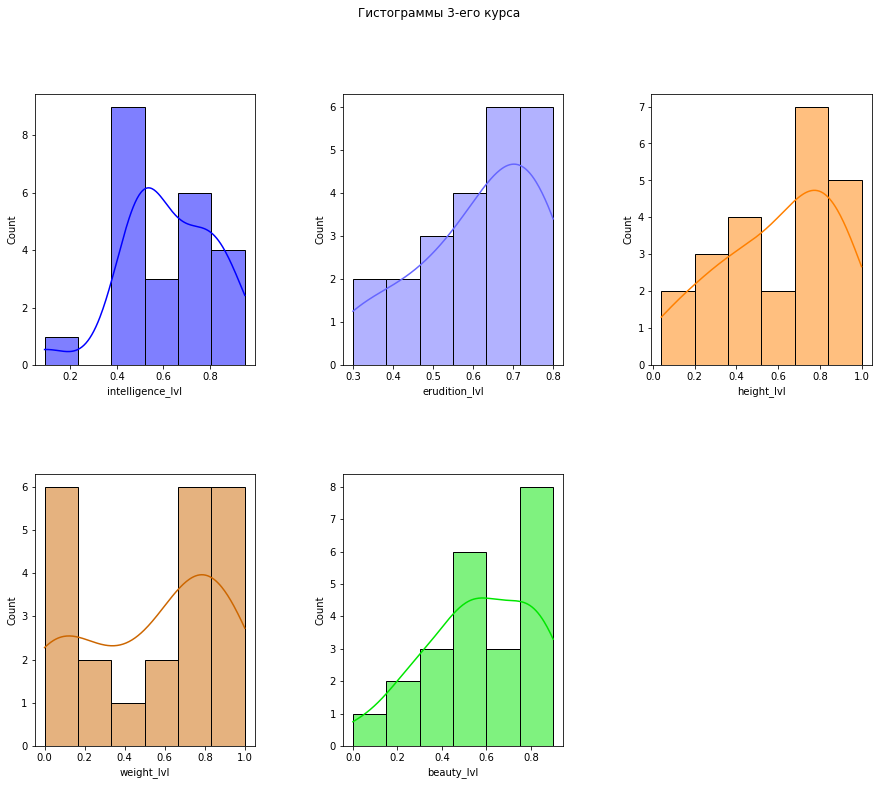

In [ ]:
set_3_year = df_main.loc[df_main['year_study'] == 3]
set_3_year_int = set_3_year['intelligence_lvl']
set_3_year_eru = set_3_year['erudition_lvl']
set_3_year_hgt = set_3_year['height_lvl']
set_3_year_wgt = set_3_year['weight_lvl']
set_3_year_bty = set_3_year['beauty_lvl']

fig = plt.figure(figsize=(15, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('Гистограммы 3-его курса')
ax = fig.add_subplot(2, 3, 1)
sb.histplot(data=set_3_year_int, kde=True, ax = ax, color = 'blue')
ax = fig.add_subplot(2, 3, 2)
sb.histplot(data=set_3_year_eru, kde=True, ax = ax, color = '#6666ff')
ax = fig.add_subplot(2, 3, 3)
sb.histplot(data=set_3_year_hgt, kde=True, ax = ax, color = '#ff8000')
ax = fig.add_subplot(2, 3, 4)
sb.histplot(data=set_3_year_wgt, kde=True, ax = ax, color = '#cc6600')
ax = fig.add_subplot(2, 3, 5)
sb.histplot(data=set_3_year_bty, kde=True, ax = ax, color = '#00e600')
plt.show()


Исследование с помощью критерия Хи-квадрат 3-го курса

In [ ]:
all_names = [set_3_year_int, set_3_year_eru, set_3_year_hgt, set_3_year_wgt, set_3_year_bty]
#print(all_names)
for namee in all_names:
  X = np.array(namee)
  N = len(X)
  nv = list()

  def ln2(N):
    return math.log(N)/math.log(2)
  #print(X)
  #print(round(math.log2(N)))
  for i in range(round(math.log2(N))):
      kol = 0
      for j in range(N):
          #print(i/round(math.log(N, 2)))
          #print(X[j])
          #print((i+1)/round(math.log(N,2)))
          if i/round(math.log(N, 2)) <= X[j] < (i+1)/round(math.log(N,2)):
              kol+=1
          if i == round(math.log2(N))-1 and X[j] == (i+1)/round(math.log2(N)):
            kol+=1
      nv.append(kol)
      
  p_0 = list()
  for i in range(round(math.log2(N))):
      a = 1/(round(math.log2(N)))
      p_0.append(a)

  p = [nv[i]/sum(nv) for i in range(round(math.log2(N)))]
  #print(p, p_0)
  pval_x = sp.stats.chisquare(p, p_0)
  print(namee.name, ":", pval_x)
  pval_x = ad_test(X, sp.stats.uniform(0,1))
  print(namee.name, ":", pval_x)
  pval_x = sp.stats.kstest(X, 'uniform', args = (0, 1))
  print(namee.name, ":", pval_x)


intelligence_lvl : Power_divergenceResult(statistic=0.5784499054820417, pvalue=0.9654280250032573)
intelligence_lvl : GofResult(statistic=3.3798112240184572, pvalue=0.01794048288070671)
intelligence_lvl : KstestResult(statistic=0.41304347826086957, pvalue=0.000458292548025706)
erudition_lvl : Power_divergenceResult(statistic=0.9565217391304346, pvalue=0.9163154820572446)
erudition_lvl : GofResult(statistic=4.094667648849871, pvalue=0.008009161512428364)
erudition_lvl : KstestResult(statistic=0.32608695652173914, pvalue=0.011173681715041187)
height_lvl : Power_divergenceResult(statistic=0.20037807183364842, pvalue=0.995304040614109)
height_lvl : GofResult(statistic=inf, pvalue=0.0)
height_lvl : KstestResult(statistic=0.22173913043478255, pvalue=0.17890498564296406)
weight_lvl : Power_divergenceResult(statistic=0.2192816635160681, pvalue=0.9944112318088448)
weight_lvl : GofResult(statistic=inf, pvalue=0.0)
weight_lvl : KstestResult(statistic=0.22173913043478255, pvalue=0.1789049856429640

/usr/local/lib/python3.7/dist-packages/skgof/ecdfgof.py:81: RuntimeWarning: divide by zero encountered in log
  return -samples - (factors * log(data * (1 - data[::-1]))).sum() / samples


Гистограммы 2-го курса

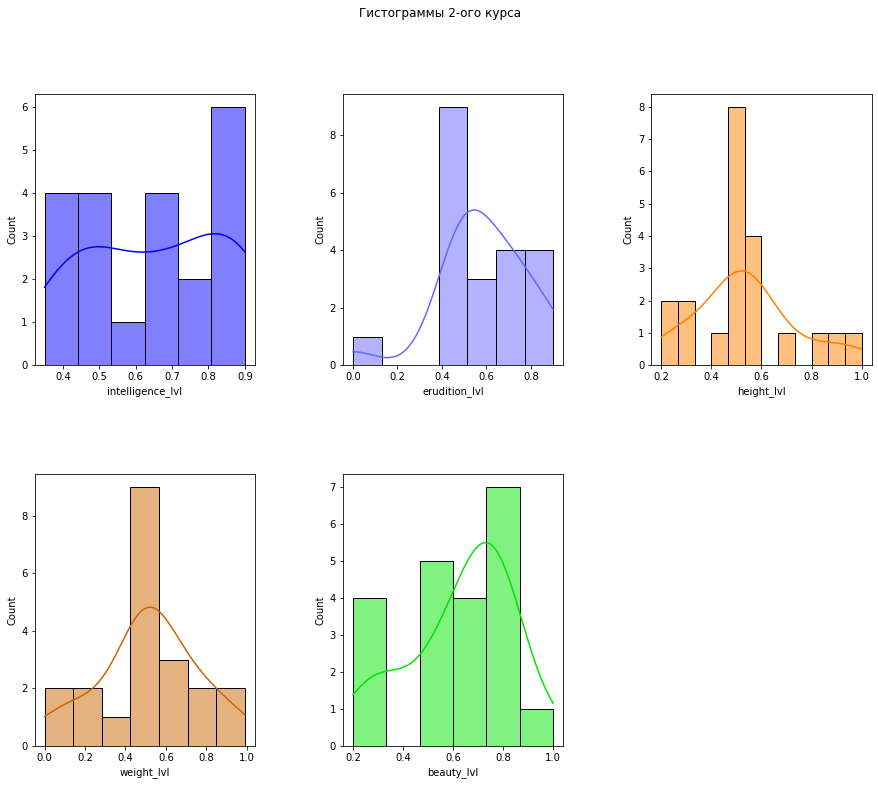

In [ ]:
set_2_year = df_main.loc[df_main['year_study'] == 2]
set_2_year_int = set_2_year['intelligence_lvl']
set_2_year_eru = set_2_year['erudition_lvl']
set_2_year_hgt = set_2_year['height_lvl']
set_2_year_wgt = set_2_year['weight_lvl']
set_2_year_bty = set_2_year['beauty_lvl']

fig = plt.figure(figsize=(15, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('Гистограммы 2-ого курса')
ax = fig.add_subplot(2, 3, 1)
sb.histplot(data=set_2_year_int, kde=True, ax = ax, color = 'blue')
ax = fig.add_subplot(2, 3, 2)
sb.histplot(data=set_2_year_eru, kde=True, ax = ax, color = '#6666ff')
ax = fig.add_subplot(2, 3, 3)
sb.histplot(data=set_2_year_hgt, kde=True, ax = ax, color = '#ff8000')
ax = fig.add_subplot(2, 3, 4)
sb.histplot(data=set_2_year_wgt, kde=True, ax = ax, color = '#cc6600')
ax = fig.add_subplot(2, 3, 5)
sb.histplot(data=set_2_year_bty, kde=True, ax = ax, color = '#00e600')
plt.show()

Исследование с помощью критерия Хи-квадрат 2-го курса

In [ ]:
all_names = [set_2_year_int, set_2_year_eru, set_2_year_hgt, set_2_year_wgt, set_2_year_bty]
#print(all_names)
for namee in all_names:
  X = np.array(namee)
  N = len(X)
  nv = list()

  def ln2(N):
    return math.log(N)/math.log(2)
  #print(X)
  #print(round(math.log2(N)))
  for i in range(round(math.log2(N))):
      kol = 0
      for j in range(N):
          #print(i/round(math.log(N, 2)))
          #print(X[j])
          #print((i+1)/round(math.log(N,2)))
          if i/round(math.log(N, 2)) <= X[j] < (i+1)/round(math.log(N,2)):
              kol+=1
          if i == round(math.log2(N))-1 and X[j] == (i+1)/round(math.log2(N)):
            kol+=1
      nv.append(kol)
      
  p_0 = list()
  for i in range(round(math.log2(N))):
      a = 1/(round(math.log2(N)))
      p_0.append(a)

  p = [nv[i]/sum(nv) for i in range(round(math.log2(N)))]
  #print(p, p_0)
  pval_x = sp.stats.chisquare(p, p_0)
  print(namee.name, ":", pval_x)
  pval_x = ad_test(X, sp.stats.uniform(0,1))
  print(namee.name, ":", pval_x)
  pval_x = sp.stats.kstest(X, 'uniform', args = (0, 1))
  print(namee.name, ":", pval_x)

intelligence_lvl : Power_divergenceResult(statistic=0.46031746031746024, pvalue=0.9275188791240048)
intelligence_lvl : GofResult(statistic=3.7730064855768113, pvalue=0.011509714363422852)
intelligence_lvl : KstestResult(statistic=0.3523809523809524, pvalue=0.007750403290165411)
erudition_lvl : Power_divergenceResult(statistic=0.9682539682539681, pvalue=0.80893291168045)
erudition_lvl : GofResult(statistic=inf, pvalue=0.0)
erudition_lvl : KstestResult(statistic=0.35714285714285715, pvalue=0.0066538660279181466)
height_lvl : Power_divergenceResult(statistic=0.7687074829931972, pvalue=0.8569362014355859)
height_lvl : GofResult(statistic=inf, pvalue=0.0)
height_lvl : KstestResult(statistic=0.2619047619047619, pvalue=0.0926284400907886)
weight_lvl : Power_divergenceResult(statistic=0.5691609977324262, pvalue=0.9034545134995474)
weight_lvl : GofResult(statistic=inf, pvalue=0.0)
weight_lvl : KstestResult(statistic=0.2619047619047619, pvalue=0.0926284400907886)
beauty_lvl : Power_divergenceRes

/usr/local/lib/python3.7/dist-packages/skgof/ecdfgof.py:81: RuntimeWarning: divide by zero encountered in log
  return -samples - (factors * log(data * (1 - data[::-1]))).sum() / samples


Гистограммы 1-го курса

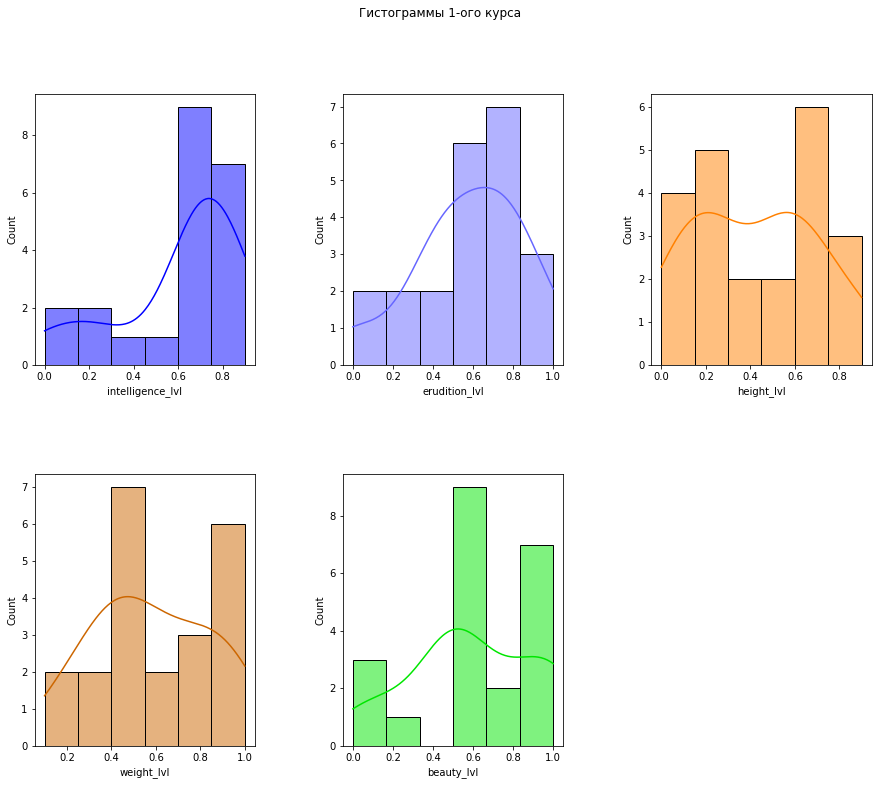

In [ ]:
set_1_year = df_main.loc[df_main['year_study'] == 1]
set_1_year_int = set_1_year['intelligence_lvl']
set_1_year_eru = set_1_year['erudition_lvl']
set_1_year_hgt = set_1_year['height_lvl']
set_1_year_wgt = set_1_year['weight_lvl']
set_1_year_bty = set_1_year['beauty_lvl']

fig = plt.figure(figsize=(15, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('Гистограммы 1-ого курса')
ax = fig.add_subplot(2, 3, 1)
sb.histplot(data=set_1_year_int, kde=True, ax = ax, color = 'blue')
ax = fig.add_subplot(2, 3, 2)
sb.histplot(data=set_1_year_eru, kde=True, ax = ax, color = '#6666ff')
ax = fig.add_subplot(2, 3, 3)
sb.histplot(data=set_1_year_hgt, kde=True, ax = ax, color = '#ff8000')
ax = fig.add_subplot(2, 3, 4)
sb.histplot(data=set_1_year_wgt, kde=True, ax = ax, color = '#cc6600')
ax = fig.add_subplot(2, 3, 5)
sb.histplot(data=set_1_year_bty, kde=True, ax = ax, color = '#00e600')
plt.show()

Исследование с помощью критерия Хи-квадрат 1-го курса

In [ ]:
all_names = [set_1_year_int, set_1_year_eru, set_1_year_hgt, set_1_year_wgt, set_1_year_bty]
#print(all_names)
for namee in all_names:
  X = np.array(namee)
  N = len(X)
  nv = list()

  def ln2(N):
    return math.log(N)/math.log(2)
  #print(X)
  #print(round(math.log2(N)))
  for i in range(round(math.log2(N))):
      kol = 0
      for j in range(N):
          #print(i/round(math.log(N, 2)))
          #print(X[j])
          #print((i+1)/round(math.log(N,2)))
          if i/round(math.log(N, 2)) <= X[j] < (i+1)/round(math.log(N,2)):
              kol+=1
          if i == round(math.log2(N))-1 and X[j] == (i+1)/round(math.log2(N)):
            kol+=1
      nv.append(kol)
      
  p_0 = list()
  for i in range(round(math.log2(N))):
      a = 1/(round(math.log2(N)))
      p_0.append(a)

  p = [nv[i]/sum(nv) for i in range(round(math.log2(N)))]
  #print(p, p_0)
  pval_x = sp.stats.chisquare(p, p_0)
  print(namee.name, ":", pval_x)
  pval_x = ad_test(X, sp.stats.uniform(0,1))
  print(namee.name, ":", pval_x)
  pval_x = sp.stats.kstest(X, 'uniform', args = (0, 1))
  print(namee.name, ":", pval_x)

intelligence_lvl : Power_divergenceResult(statistic=0.3719008264462809, pvalue=0.9459839552322128)
intelligence_lvl : GofResult(statistic=inf, pvalue=0.0)
intelligence_lvl : KstestResult(statistic=0.3818181818181818, pvalue=0.0021514226197436068)
erudition_lvl : Power_divergenceResult(statistic=0.23966942148760334, pvalue=0.9709446450385452)
erudition_lvl : GofResult(statistic=inf, pvalue=0.0)
erudition_lvl : KstestResult(statistic=0.2272727272727273, pvalue=0.17622819359715172)
height_lvl : Power_divergenceResult(statistic=0.20661157024793392, pvalue=0.9765149726473212)
height_lvl : GofResult(statistic=inf, pvalue=0.0)
height_lvl : KstestResult(statistic=0.21818181818181825, pvalue=0.21240043964644387)
weight_lvl : Power_divergenceResult(statistic=0.15702479338842973, pvalue=0.9842091812649795)
weight_lvl : GofResult(statistic=inf, pvalue=0.0)
weight_lvl : KstestResult(statistic=0.2181818181818182, pvalue=0.21240043964644412)
beauty_lvl : Power_divergenceResult(statistic=0.48760330578

/usr/local/lib/python3.7/dist-packages/skgof/ecdfgof.py:81: RuntimeWarning: divide by zero encountered in log
  return -samples - (factors * log(data * (1 - data[::-1]))).sum() / samples


# Задача 2
# Зависят ли оценки людей в разных областях? 


In [ ]:
#fig = plt.figure(figsize=(15, 12))
#fig.subplots_adjust(hspace=0.4, wspace=0.4)
#fig.suptitle('Зависимость оценок 3-его курса')
#sb.jointplot(x='intelligence_lvl', y='erudition_lvl', data=set_3_year, kind='scatter')
#sb.jointplot(x='intelligence_lvl', y='height_lvl', data=set_3_year, kind='scatter')
#sb.jointplot(x='intelligence_lvl', y='weight_lvl', data=set_3_year, kind='scatter')
#sb.jointplot(x='intelligence_lvl', y='beauty_lvl', data=set_3_year, kind='scatter')
#sb.jointplot(x='erudition_lvl', y='height_lvl', data=set_3_year, kind='scatter')
#sb.jointplot(x='erudition_lvl', y='weight_lvl', data=set_3_year, kind='scatter')
#sb.jointplot(x='erudition_lvl', y='beauty_lvl', data=set_3_year, kind='scatter')
#sb.jointplot(x='height_lvl', y='weight_lvl', data=set_3_year, kind='scatter')
#sb.jointplot(x='height_lvl', y='beauty_lvl', data=set_3_year, kind='scatter')
#sb.jointplot(x='weight_lvl', y='beauty_lvl', data=set_3_year, kind='scatter')

Зависимость оценок всех курсов

int vs eru:  WilcoxonResult(statistic=619.0, pvalue=0.392360714793645)
int vs hgt:  WilcoxonResult(statistic=539.0, pvalue=0.00895373140831708)
int vs wgt:  WilcoxonResult(statistic=673.5, pvalue=0.05063729733016343)
int vs bty:  WilcoxonResult(statistic=829.5, pvalue=0.5288694104774767)
eru vs hgt:  WilcoxonResult(statistic=485.5, pvalue=0.14178342145766062)
eru vs wgt:  WilcoxonResult(statistic=677.0, pvalue=0.234589161960845)
eru vs bty:  WilcoxonResult(statistic=695.0, pvalue=0.6822244838264897)
hgt vs wgt:  WilcoxonResult(statistic=810.0, pvalue=0.7245058737437385)
hgt vs bty:  WilcoxonResult(statistic=726.0, pvalue=0.11463263228886267)
wgt vs bty:  WilcoxonResult(statistic=607.0, pvalue=0.11897288885065618)
int vs eru:  (0.20933572803484052, 0.09162177649302689)
int vs hgt:  (0.2360898840305807, 0.05633562341524616)
int vs wgt:  (0.05279358379618034, 0.6737579107607335)
int vs bty:  (0.46281559756115787, 9.125072545686756e-05)
eru vs hgt:  (0.09643743883454318, 0.4411278643615971

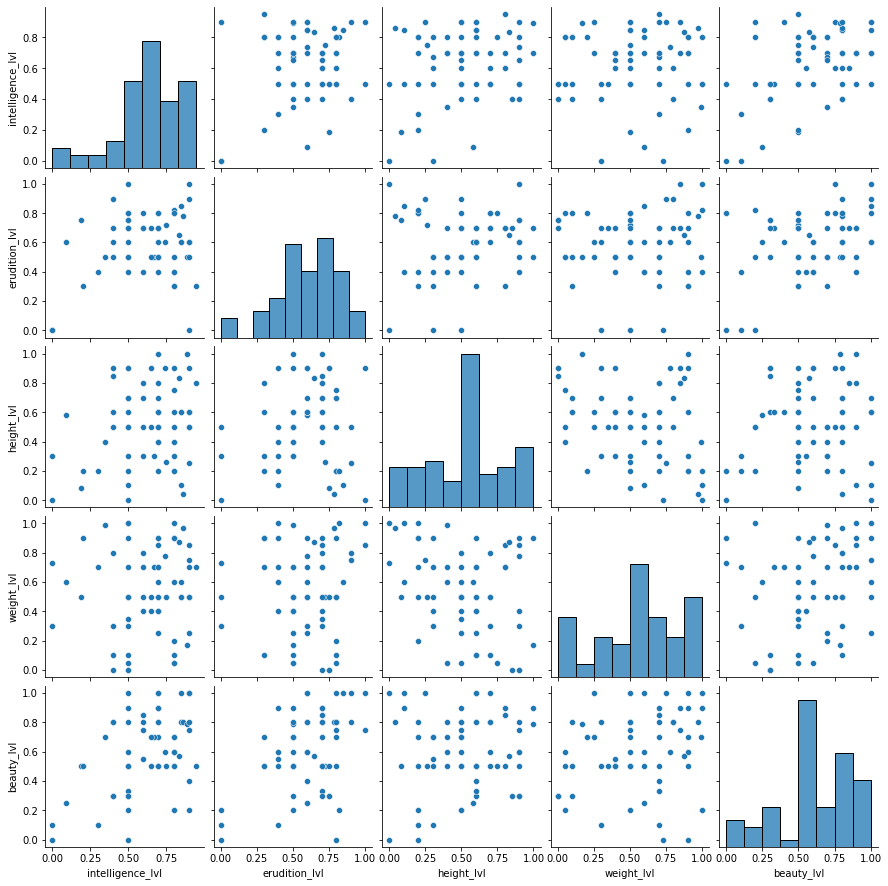

In [ ]:
sb.pairplot(df_main[['intelligence_lvl', 'erudition_lvl', 'height_lvl', 'weight_lvl', 'beauty_lvl']])

#g = sb.pairplot(df_main[['intelligence_lvl', 'erudition_lvl', 'height_lvl', 'weight_lvl', 'beauty_lvl']], diag_kind="kde")
#g.map_lower(sb.kdeplot, levels=4, color=".2")

#sb.pairplot(df_main[['intelligence_lvl', 'erudition_lvl', 'height_lvl', 'weight_lvl', 'beauty_lvl']], kind='hist')

print('int vs eru: ',sp.stats.wilcoxon(df_main['intelligence_lvl'], df_main['erudition_lvl']))
print('int vs hgt: ',sp.stats.wilcoxon(df_main['intelligence_lvl'], df_main['height_lvl']))
print('int vs wgt: ',sp.stats.wilcoxon(df_main['intelligence_lvl'], df_main['weight_lvl']))
print('int vs bty: ',sp.stats.wilcoxon(df_main['intelligence_lvl'], df_main['beauty_lvl']))
print('eru vs hgt: ',sp.stats.wilcoxon(df_main['erudition_lvl'], df_main['height_lvl']))
print('eru vs wgt: ',sp.stats.wilcoxon(df_main['erudition_lvl'], df_main['weight_lvl']))
print('eru vs bty: ',sp.stats.wilcoxon(df_main['erudition_lvl'], df_main['beauty_lvl']))
print('hgt vs wgt: ',sp.stats.wilcoxon(df_main['height_lvl'], df_main['weight_lvl']))
print('hgt vs bty: ',sp.stats.wilcoxon(df_main['height_lvl'], df_main['beauty_lvl']))
print('wgt vs bty: ',sp.stats.wilcoxon(df_main['weight_lvl'], df_main['beauty_lvl']))

print('int vs eru: ',sp.stats.pearsonr(df_main['intelligence_lvl'], df_main['erudition_lvl']))
print('int vs hgt: ',sp.stats.pearsonr(df_main['intelligence_lvl'], df_main['height_lvl']))
print('int vs wgt: ',sp.stats.pearsonr(df_main['intelligence_lvl'], df_main['weight_lvl']))
print('int vs bty: ',sp.stats.pearsonr(df_main['intelligence_lvl'], df_main['beauty_lvl']))
print('eru vs hgt: ',sp.stats.pearsonr(df_main['erudition_lvl'], df_main['height_lvl']))
print('eru vs wgt: ',sp.stats.pearsonr(df_main['erudition_lvl'], df_main['weight_lvl']))
print('eru vs bty: ',sp.stats.pearsonr(df_main['erudition_lvl'], df_main['beauty_lvl']))
print('hgt vs wgt: ',sp.stats.pearsonr(df_main['height_lvl'], df_main['weight_lvl']))
print('hgt vs bty: ',sp.stats.pearsonr(df_main['height_lvl'], df_main['beauty_lvl']))
print('wgt vs bty: ',sp.stats.pearsonr(df_main['weight_lvl'], df_main['beauty_lvl']))

print('int vs eru: ',sp.stats.spearmanr(df_main['intelligence_lvl'], df_main['erudition_lvl']))
print('int vs hgt: ',sp.stats.spearmanr(df_main['intelligence_lvl'], df_main['height_lvl']))
print('int vs wgt: ',sp.stats.spearmanr(df_main['intelligence_lvl'], df_main['weight_lvl']))
print('int vs bty: ',sp.stats.spearmanr(df_main['intelligence_lvl'], df_main['beauty_lvl']))
print('eru vs hgt: ',sp.stats.spearmanr(df_main['erudition_lvl'], df_main['height_lvl']))
print('eru vs wgt: ',sp.stats.spearmanr(df_main['erudition_lvl'], df_main['weight_lvl']))
print('eru vs bty: ',sp.stats.spearmanr(df_main['erudition_lvl'], df_main['beauty_lvl']))
print('hgt vs wgt: ',sp.stats.spearmanr(df_main['height_lvl'], df_main['weight_lvl']))
print('hgt vs bty: ',sp.stats.spearmanr(df_main['height_lvl'], df_main['beauty_lvl']))
print('wgt vs bty: ',sp.stats.spearmanr(df_main['weight_lvl'], df_main['beauty_lvl']))

print('int vs eru: ',sp.stats.kendalltau(df_main['intelligence_lvl'], df_main['erudition_lvl']))
print('int vs hgt: ',sp.stats.kendalltau(df_main['intelligence_lvl'], df_main['height_lvl']))
print('int vs wgt: ',sp.stats.kendalltau(df_main['intelligence_lvl'], df_main['weight_lvl']))
print('int vs bty: ',sp.stats.kendalltau(df_main['intelligence_lvl'], df_main['beauty_lvl']))
print('eru vs hgt: ',sp.stats.kendalltau(df_main['erudition_lvl'], df_main['height_lvl']))
print('eru vs wgt: ',sp.stats.kendalltau(df_main['erudition_lvl'], df_main['weight_lvl']))
print('eru vs bty: ',sp.stats.kendalltau(df_main['erudition_lvl'], df_main['beauty_lvl']))
print('hgt vs wgt: ',sp.stats.kendalltau(df_main['height_lvl'], df_main['weight_lvl']))
print('hgt vs bty: ',sp.stats.kendalltau(df_main['height_lvl'], df_main['beauty_lvl']))
print('wgt vs bty: ',sp.stats.kendalltau(df_main['weight_lvl'], df_main['beauty_lvl']))

mgc = sp.stats.multiscale_graphcorr(np.array(df_main['intelligence_lvl']), np.array(df_main['erudition_lvl']))
print('int vs eru: ',mgc[0],mgc[1])
mgc = sp.stats.multiscale_graphcorr(np.array(df_main['intelligence_lvl']), np.array(df_main['height_lvl']))
print('int vs hgt: ',mgc[0],mgc[1])
mgc = sp.stats.multiscale_graphcorr(np.array(df_main['intelligence_lvl']), np.array(df_main['weight_lvl']))
print('int vs wgt: ',mgc[0],mgc[1])
mgc = sp.stats.multiscale_graphcorr(np.array(df_main['intelligence_lvl']), np.array(df_main['beauty_lvl']))
print('int vs bty: ',mgc[0],mgc[1])
mgc = sp.stats.multiscale_graphcorr(np.array(df_main['erudition_lvl']), np.array(df_main['height_lvl']))
print('eru vs hgt: ',mgc[0],mgc[1])
mgc = sp.stats.multiscale_graphcorr(np.array(df_main['erudition_lvl']), np.array(df_main['weight_lvl']))
print('eru vs wgt: ',mgc[0],mgc[1])
mgc = sp.stats.multiscale_graphcorr(np.array(df_main['erudition_lvl']), np.array(df_main['beauty_lvl']))
print('eru vs bty: ',mgc[0],mgc[1])
mgc = sp.stats.multiscale_graphcorr(np.array(df_main['height_lvl']), np.array(df_main['weight_lvl']))
print('hgt vs wgt: ',mgc[0],mgc[1])
mgc = sp.stats.multiscale_graphcorr(np.array(df_main['height_lvl']), np.array(df_main['beauty_lvl']))
print('hgt vs bty: ',mgc[0],mgc[1])
mgc = sp.stats.multiscale_graphcorr(np.array(df_main['weight_lvl']), np.array(df_main['beauty_lvl']))
print('wgt vs bty: ',mgc[0],mgc[1])

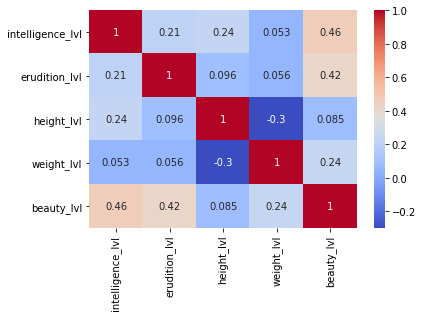

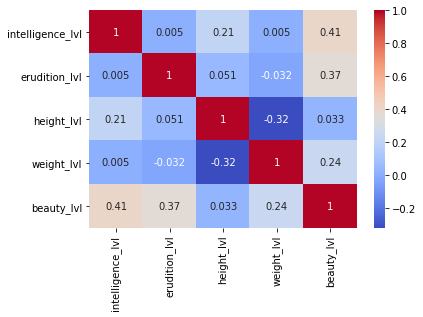

In [ ]:
corr_matrix = df_main[['intelligence_lvl', 'erudition_lvl', 'height_lvl', 'weight_lvl', 'beauty_lvl']].corr().round(3)
pcorr_matrix = df_main[['intelligence_lvl', 'erudition_lvl', 'height_lvl', 'weight_lvl', 'beauty_lvl']].pcorr().round(3)
sb.heatmap(corr_matrix,cmap='coolwarm',annot=True)
plt.show()
sb.heatmap(pcorr_matrix,cmap='coolwarm',annot=True)
plt.show()

Зависимость оценок 3-его курса


int vs eru:  WilcoxonResult(statistic=84.0, pvalue=0.9477972741292354)
int vs hgt:  WilcoxonResult(statistic=110.0, pvalue=0.8482361333664451)
int vs wgt:  WilcoxonResult(statistic=85.5, pvalue=0.29667205092254956)
int vs bty:  WilcoxonResult(statistic=92.0, pvalue=0.4137224974294329)
eru vs hgt:  WilcoxonResult(statistic=71.0, pvalue=0.7942480763482842)
eru vs wgt:  WilcoxonResult(statistic=64.5, pvalue=0.3600250832871207)
eru vs bty:  WilcoxonResult(statistic=94.0, pvalue=0.6811910765956346)
hgt vs wgt:  WilcoxonResult(statistic=103.5, pvalue=0.45491167887846384)
hgt vs bty:  WilcoxonResult(statistic=106.0, pvalue=0.5054770301286221)
wgt vs bty:  WilcoxonResult(statistic=92.0, pvalue=0.6272960250353408)


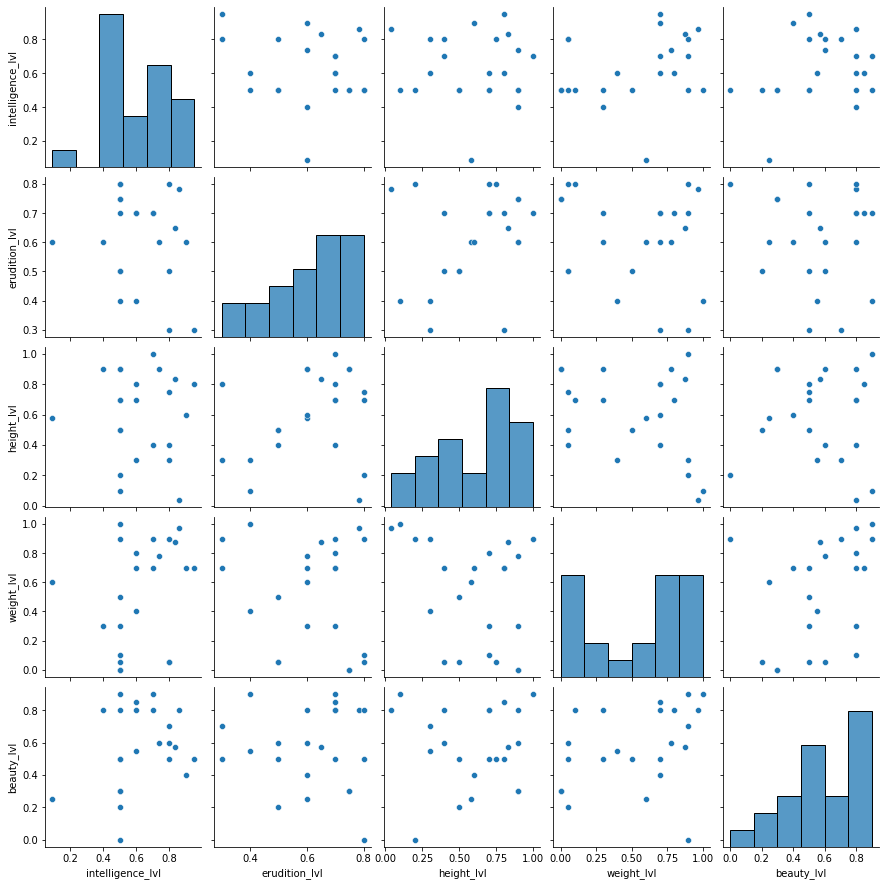

In [ ]:
sb.pairplot(set_3_year[['intelligence_lvl', 'erudition_lvl', 'height_lvl', 'weight_lvl', 'beauty_lvl']])

print('int vs eru: ',sp.stats.wilcoxon(set_3_year['intelligence_lvl'], set_3_year['erudition_lvl']))
print('int vs hgt: ',sp.stats.wilcoxon(set_3_year['intelligence_lvl'], set_3_year['height_lvl']))
print('int vs wgt: ',sp.stats.wilcoxon(set_3_year['intelligence_lvl'], set_3_year['weight_lvl']))
print('int vs bty: ',sp.stats.wilcoxon(set_3_year['intelligence_lvl'], set_3_year['beauty_lvl']))
print('eru vs hgt: ',sp.stats.wilcoxon(set_3_year['erudition_lvl'], set_3_year['height_lvl']))
print('eru vs wgt: ',sp.stats.wilcoxon(set_3_year['erudition_lvl'], set_3_year['weight_lvl']))
print('eru vs bty: ',sp.stats.wilcoxon(set_3_year['erudition_lvl'], set_3_year['beauty_lvl']))
print('hgt vs wgt: ',sp.stats.wilcoxon(set_3_year['height_lvl'], set_3_year['weight_lvl']))
print('hgt vs bty: ',sp.stats.wilcoxon(set_3_year['height_lvl'], set_3_year['beauty_lvl']))
print('wgt vs bty: ',sp.stats.wilcoxon(set_3_year['weight_lvl'], set_3_year['beauty_lvl']))

Зависимость оценок 2-го курса

int vs eru:  WilcoxonResult(statistic=72.0, pvalue=0.3541818240718082)
int vs hgt:  WilcoxonResult(statistic=53.5, pvalue=0.05418962098255041)
int vs wgt:  WilcoxonResult(statistic=43.5, pvalue=0.037889549778498934)
int vs bty:  WilcoxonResult(statistic=73.0, pvalue=0.5854682084825917)
eru vs hgt:  WilcoxonResult(statistic=57.0, pvalue=0.35420024342300327)
eru vs wgt:  WilcoxonResult(statistic=62.0, pvalue=0.3051839330815499)
eru vs bty:  WilcoxonResult(statistic=53.5, pvalue=0.27368414059714863)
hgt vs wgt:  WilcoxonResult(statistic=67.5, pvalue=0.9793354710013151)
hgt vs bty:  WilcoxonResult(statistic=77.5, pvalue=0.3042488147696438)
wgt vs bty:  WilcoxonResult(statistic=42.5, pvalue=0.10642380631620774)


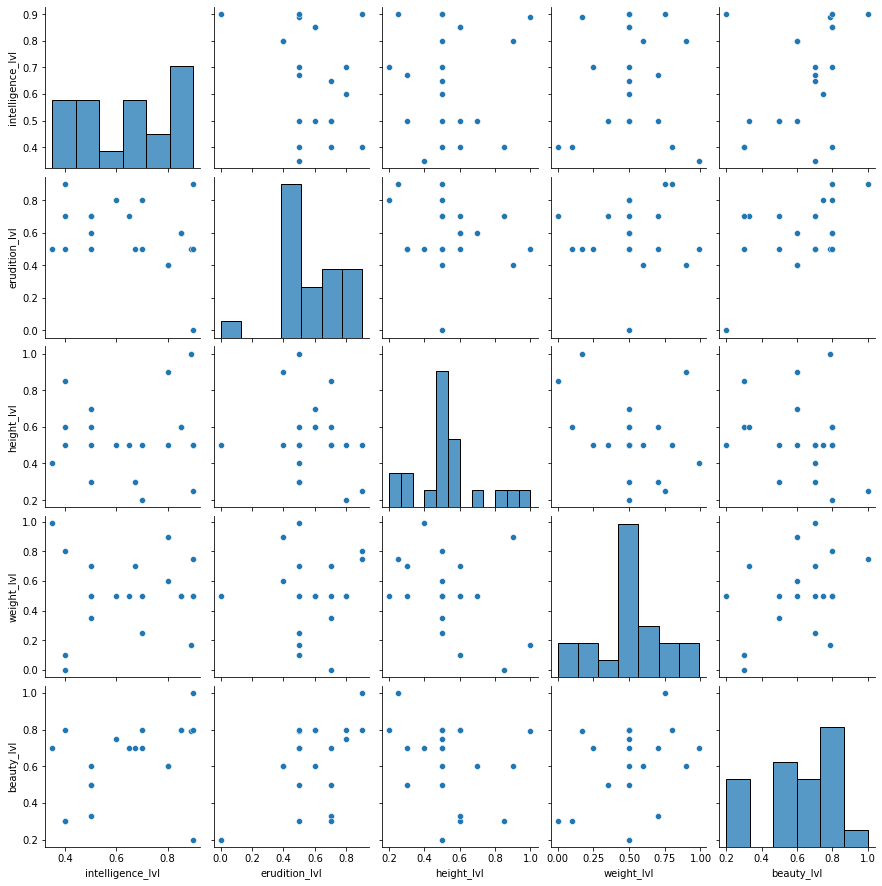

In [ ]:
sb.pairplot(set_2_year[['intelligence_lvl', 'erudition_lvl', 'height_lvl', 'weight_lvl', 'beauty_lvl']])

print('int vs eru: ',sp.stats.wilcoxon(set_2_year['intelligence_lvl'], set_2_year['erudition_lvl']))
print('int vs hgt: ',sp.stats.wilcoxon(set_2_year['intelligence_lvl'], set_2_year['height_lvl']))
print('int vs wgt: ',sp.stats.wilcoxon(set_2_year['intelligence_lvl'], set_2_year['weight_lvl']))
print('int vs bty: ',sp.stats.wilcoxon(set_2_year['intelligence_lvl'], set_2_year['beauty_lvl']))
print('eru vs hgt: ',sp.stats.wilcoxon(set_2_year['erudition_lvl'], set_2_year['height_lvl']))
print('eru vs wgt: ',sp.stats.wilcoxon(set_2_year['erudition_lvl'], set_2_year['weight_lvl']))
print('eru vs bty: ',sp.stats.wilcoxon(set_2_year['erudition_lvl'], set_2_year['beauty_lvl']))
print('hgt vs wgt: ',sp.stats.wilcoxon(set_2_year['height_lvl'], set_2_year['weight_lvl']))
print('hgt vs bty: ',sp.stats.wilcoxon(set_2_year['height_lvl'], set_2_year['beauty_lvl']))
print('wgt vs bty: ',sp.stats.wilcoxon(set_2_year['weight_lvl'], set_2_year['beauty_lvl']))

Зависимость оценок 1-го курса

int vs eru:  WilcoxonResult(statistic=52.5, pvalue=0.4221515701563552)
int vs hgt:  WilcoxonResult(statistic=27.0, pvalue=0.010731340500990161)
int vs wgt:  WilcoxonResult(statistic=111.5, pvalue=0.8893512349464567)
int vs bty:  WilcoxonResult(statistic=110.0, pvalue=0.8481793823283927)
eru vs hgt:  WilcoxonResult(statistic=35.0, pvalue=0.08729886592726586)
eru vs wgt:  WilcoxonResult(statistic=111.0, pvalue=0.875617120696772)
eru vs bty:  WilcoxonResult(statistic=71.5, pvalue=0.8127165842711892)
hgt vs wgt:  WilcoxonResult(statistic=64.0, pvalue=0.1250666898430363)
hgt vs bty:  WilcoxonResult(statistic=43.5, pvalue=0.037636279010325235)
wgt vs bty:  WilcoxonResult(statistic=83.0, pvalue=0.6270623191759823)


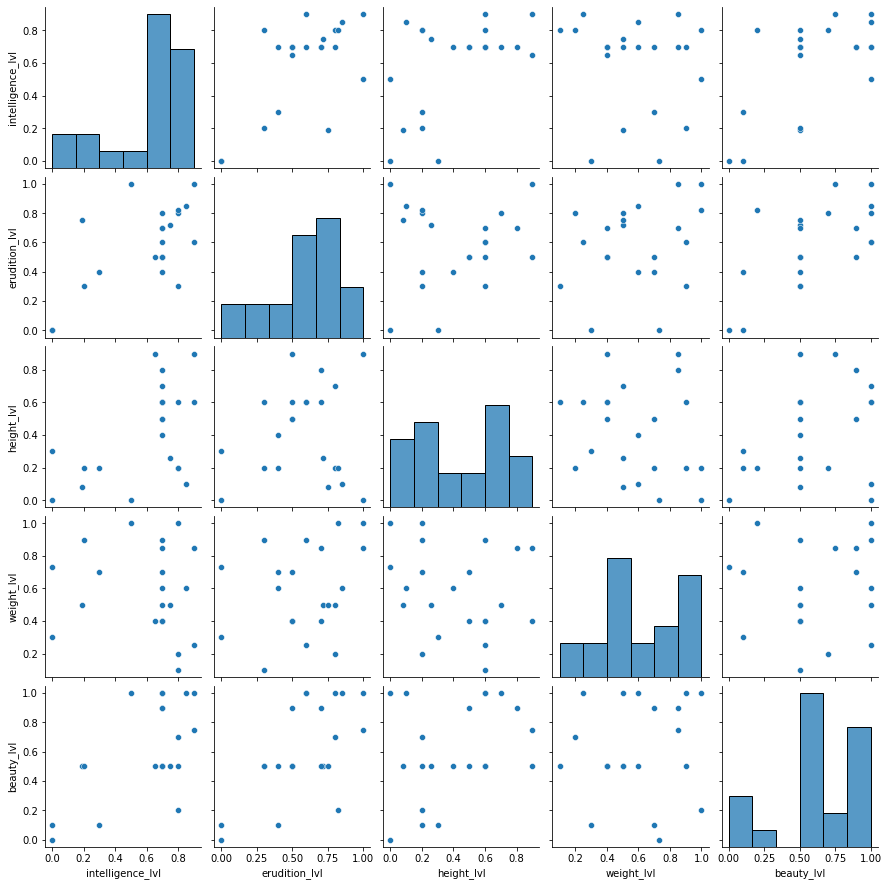

In [ ]:
sb.pairplot(set_1_year[['intelligence_lvl', 'erudition_lvl', 'height_lvl', 'weight_lvl', 'beauty_lvl']])

print('int vs eru: ',sp.stats.wilcoxon(set_1_year['intelligence_lvl'], set_1_year['erudition_lvl']))
print('int vs hgt: ',sp.stats.wilcoxon(set_1_year['intelligence_lvl'], set_1_year['height_lvl']))
print('int vs wgt: ',sp.stats.wilcoxon(set_1_year['intelligence_lvl'], set_1_year['weight_lvl']))
print('int vs bty: ',sp.stats.wilcoxon(set_1_year['intelligence_lvl'], set_1_year['beauty_lvl']))
print('eru vs hgt: ',sp.stats.wilcoxon(set_1_year['erudition_lvl'], set_1_year['height_lvl']))
print('eru vs wgt: ',sp.stats.wilcoxon(set_1_year['erudition_lvl'], set_1_year['weight_lvl']))
print('eru vs bty: ',sp.stats.wilcoxon(set_1_year['erudition_lvl'], set_1_year['beauty_lvl']))
print('hgt vs wgt: ',sp.stats.wilcoxon(set_1_year['height_lvl'], set_1_year['weight_lvl']))
print('hgt vs bty: ',sp.stats.wilcoxon(set_1_year['height_lvl'], set_1_year['beauty_lvl']))
print('wgt vs bty: ',sp.stats.wilcoxon(set_1_year['weight_lvl'], set_1_year['beauty_lvl']))

# Задача 3
# Одинаково ли юноши и девушки оценивают себя? 


man vs woman on int:  Ks_2sampResult(statistic=0.18412698412698414, pvalue=0.6398487585398527)
man vs woman on eru:  Ks_2sampResult(statistic=0.16825396825396827, pvalue=0.7483353098119986)
man vs woman on hgt:  Ks_2sampResult(statistic=0.4095238095238095, pvalue=0.011266045918893686)
man vs woman on wgt:  Ks_2sampResult(statistic=0.2222222222222222, pvalue=0.41116982923001977)
man vs woman on bty:  Ks_2sampResult(statistic=0.3111111111111111, pvalue=0.09783329848418043)
man vs woman on int:  Anderson_ksampResult(statistic=-0.3432180945120064, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
man vs woman on eru:  Anderson_ksampResult(statistic=0.17161010835298826, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
man vs woman on hgt:  Anderson_ksampResult(statistic=6.02190848354351, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001519621587

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: p-value capped: true value larger than 0.25
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: p-value capped: true value larger than 0.25
  del sys.path[0]


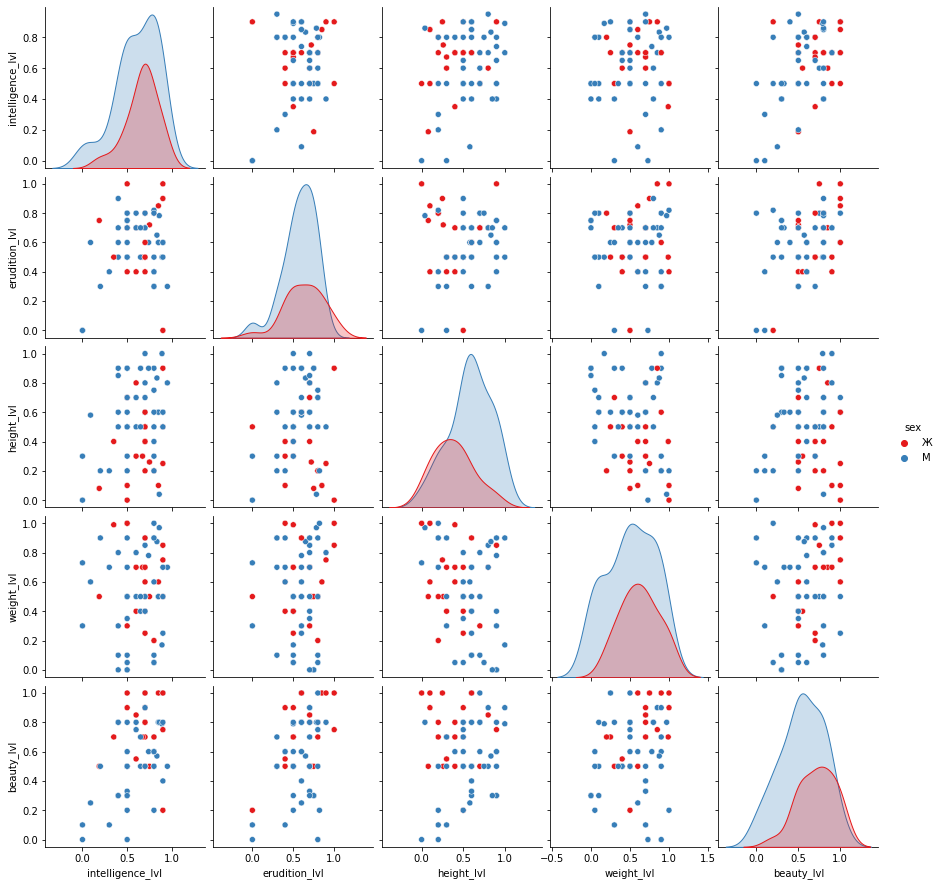

In [ ]:
sb.pairplot(df_main[['sex' ,'intelligence_lvl', 'erudition_lvl', 'height_lvl', 'weight_lvl', 'beauty_lvl']], hue='sex', palette='Set1')

set_man = df_main.loc[df_main['sex'] == 'М']
set_woman = df_main.loc[df_main['sex'] == 'Ж']

print('man vs woman on int: ',sp.stats.ks_2samp(set_man['intelligence_lvl'], set_woman['intelligence_lvl']))
print('man vs woman on eru: ',sp.stats.ks_2samp(set_man['erudition_lvl'], set_woman['erudition_lvl']))
print('man vs woman on hgt: ',sp.stats.ks_2samp(set_man['height_lvl'], set_woman['height_lvl']))
print('man vs woman on wgt: ',sp.stats.ks_2samp(set_man['weight_lvl'], set_woman['weight_lvl']))
print('man vs woman on bty: ',sp.stats.ks_2samp(set_man['beauty_lvl'], set_woman['beauty_lvl']))

print('man vs woman on int: ',sp.stats.anderson_ksamp([np.array(set_man['intelligence_lvl']), np.array(set_woman['intelligence_lvl'])]))
print('man vs woman on eru: ',sp.stats.anderson_ksamp([np.array(set_man['erudition_lvl']), np.array(set_woman['erudition_lvl'])]))
print('man vs woman on hgt: ',sp.stats.anderson_ksamp([np.array(set_man['height_lvl']), np.array(set_woman['height_lvl'])]))
print('man vs woman on wgt: ',sp.stats.anderson_ksamp([np.array(set_man['weight_lvl']), np.array(set_woman['weight_lvl'])]))
print('man vs woman on bty: ',sp.stats.anderson_ksamp([np.array(set_man['beauty_lvl']), np.array(set_woman['beauty_lvl'])]))